# Part 1 - Cross-Section Data

## Importing the libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats



## Load data

In [45]:
df = pd.read_csv('../data/HPRICE2.raw', sep='\s+', header=None)
df.shape


(506, 12)

### Show first 5 rows of the dataframe

In [46]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678


### Assign Column Names

In [47]:
# Assign column names, fetched from the DES file 
column_names = [
    "price",      # median housing price, $
    "crime",      # crimes committed per capita
    "nox",        # nitrous oxide, parts per 100 mill.
    "rooms",      # avg number of rooms per house
    "dist",       # weighted dist. to 5 employ centers
    "radial",     # accessibility index to radial hghwys
    "proptax",    # property tax per $1000
    "stratio",    # average student-teacher ratio
    "lowstat",    # % of people 'lower status'
    "lprice",     # log(price)
    "lnox",       # log(nox)
    "lproptax"    # log(proptax)
]

# Assign these column names to the DataFrame
df.columns = column_names

### Show first 5 rows of the dataframe

In [48]:
df.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678


# Questions
---

### 1. State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators are unbiased.


**Answer:** The fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators are unbiased is that the error term is uncorrelated with the independent variables. Meaning 
$$\mathbb{E}[\hat{\beta}] = \beta$$

and 

$$\mathbb{E}[\varepsilon \mid X] = 0$$
---



### 2. Show that under this assumption the OLS estimators are indeed unbiased.

The **OLS estimator** is defined as:

$$
\hat{\beta} = (X^\top X)^{-1} X^\top y
$$

This formula calculates the coefficients that minimize the sum of squared residuals in the linear regression model, in a straight computation.

The regression model is written as:
$$
y = X\beta + \varepsilon
$$

Substituting $y$ into the OLS estimator:
$$
\hat{\beta} = (X^\top X)^{-1} X^\top (X\beta + \varepsilon)
$$
Simplifying:
$$
\hat{\beta} = (X^\top X)^{-1} X^\top X\beta + (X^\top X)^{-1} X^\top \varepsilon = \beta + (X^\top X)^{-1} X^\top \varepsilon
$$

Taking expectations:
$$
\mathbb{E}[\hat{\beta}] = \beta + (X^\top X)^{-1} X^\top \mathbb{E}[\varepsilon]
$$

If the fundamental hypothesis $\mathbb{E}[\varepsilon \mid X] = 0$ holds, then $\mathbb{E}[\varepsilon] = 0$, leading to:
$$
\mathbb{E}[\hat{\beta}] = \beta
$$
---

### 3. Explain the sample selection bias with an example from the course.
**Answer:** Sample selection bias occurs when the data analyzed is not representative of the entire population, often due to the way the sample is selected. An example talked about in the course is for example WWII RAF aircraft which illustrates this: engineers analyzed returning planes and proposed reinforcing areas with the most bullet holes, overlooking that these planes survived despite damage. Abraham Wald corrected this by suggesting reinforcement in areas with little or no damage on returning planes, as planes hit in those critical areas likely did not return. This example highlights the importance of considering what is missing from the sample to avoid biased conclusions.   

---

### 4. Explain the omitted variable bias with an example from the course.
**Answer:** Omitted variable bias occurs when an important variable that influences the outcome is left out of the analysis, leading to biased and inconsistent estimates. In the example of studying the effect of fertilizers on agricultural yield, the omitted variable is soil quality, which also impacts yield. If farmers tend to apply more fertilizer to high-quality land, the statistical analysis might overestimate the effect of fertilizer because it incorrectly attributes the higher yields entirely to fertilizer, ignoring the contribution of soil quality. Hence, the estimated outcome is said to be biased.

---


### 5. Explain the problem of multicollinearity. Is it a problem in this dataset? (Meaning the loaded df)
**Answer:** Multicollinearity occurs when two or more columns of the dataset
are highly or nearly linearly dependent, meaning one variable can be almost perfectly predicted from the others. This makes it difficult to estimate the individual effects of each variable on the dependent variable. The following cell shows the correlation matrix of the dataset, which can be used to identify multicollinearity. If the correlation between two variables is close to 1 or -1, it indicates multicollinearity. In this dataset, multicollinearity does not seem to be a problem as the correlation values are not close to 1 or -1. It should be noted that the log relationship between the columns does naturally show a high correlation, but this is not a problem as it is expected.

---

In [49]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Highlight correlations above a threshold (e.g., > 0.8)
threshold = 0.8
high_correlation = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix != 1.0)]
print("Highly correlated pairs:\n", high_correlation)

             price     crime       nox     rooms      dist    radial  \
price     1.000000 -0.387919 -0.426037  0.695780  0.249339 -0.380837   
crime    -0.387919  1.000000  0.421152 -0.218816 -0.379909  0.625442   
nox      -0.426037  0.421152  1.000000 -0.302828 -0.770222  0.610328   
rooms     0.695780 -0.218816 -0.302828  1.000000  0.205410 -0.209773   
dist      0.249339 -0.379909 -0.770222  0.205410  1.000000 -0.495065   
radial   -0.380837  0.625442  0.610328 -0.209773 -0.495065  1.000000   
proptax  -0.467087  0.582819  0.666981 -0.292120 -0.534379  0.910228   
stratio  -0.503340  0.288691  0.186863 -0.354008 -0.229269  0.464244   
lowstat  -0.726391  0.447033  0.585613 -0.609605 -0.495602  0.476038   
lprice    0.953320 -0.527495 -0.508767  0.632909  0.342008 -0.480971   
lnox     -0.429447  0.429639  0.993943 -0.304988 -0.808795  0.624171   
lproptax -0.473167  0.551393  0.659206 -0.299269 -0.513897  0.863531   

           proptax   stratio   lowstat    lprice      lnox  lpr

---

### 6. Create three categories of `nox` levels (low, medium, high), corresponding to the following percentiles: 0-25%, 26%-74%, 75%-100%.


In [50]:
low, high = df['nox'].quantile([0.25, 0.75])

df['nox_category'] = pd.cut(
    df['nox'], 
    bins=[-float('inf'), low, high, float('inf')], 
    labels=['Low', 'Medium', 'High']
)
print(str(df.shape) + " - this is the same number of rows, and one more column")
df.head(2)

(506, 13) - this is the same number of rows, and one more column


,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax,nox_category
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360,Medium
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938,Medium


### Save the dataframe so we can use it for the next part

In [51]:
# Save the DataFrame to a CSV file
df.to_csv('../data/HPRICE2_processed.csv', index=False)

---

### 7. Compute for each category of `nox` level the average median price and comment on your results.


In [52]:
average_price_per_category = df.groupby('nox_category', observed=False)['price'].mean()

print(average_price_per_category)

nox_category
Low       26977.093750
Medium    22741.555118
High      17430.653226
Name: price, dtype: float64


---


### 8. Produce a scatter plot with the variable `price` on the y-axis and the variable `nox` on the x-axis. Is this a ceteris paribus effect?
**Answer:** For a ceteris paribus effect, we would need to hold all other variables constant while analyzing the relationship between `price` and `nox`. In this scatter plot, we are not holding other variables constant, so it does not represent a ceteris paribus effect. The scatter plot shows the relationship between `price` and `nox` without controlling for other variables, making it difficult to isolate the effect of `nox` on `price`.


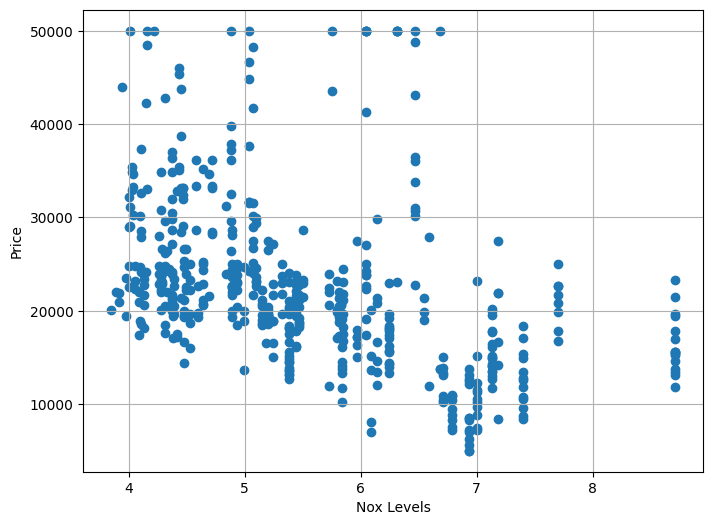

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(df['nox'], df['price'])
plt.xlabel('Nox Levels')
plt.ylabel('Price')
plt.grid(True)
plt.show()


---


### 9. Run a regression of `price` on a constant, `crime`, `nox`, `rooms`, and `proptax`. Comment on the histogram of the residuals. Interpret all coefficients.
**Answer:** To do this regression, we will use the `statsmodels` library in Python. The regression model is written as:
$$
price = \beta_0 + \beta_1 \cdot crime + \beta_2 \cdot nox + \beta_3 \cdot rooms + \beta_4 \cdot proptax + \varepsilon
$$




In [54]:
X9 = df[['crime', 'nox', 'rooms', 'proptax']]  # Independent variables
X9 = sm.add_constant(X9)  # Add a constant term to the model
y9 = df['price']  # Dependent variable
X9.head()

,const,crime,nox,rooms,proptax
0,1.0,0.006,5.38,6.57,29.6
1,1.0,0.027,4.69,6.42,24.2
2,1.0,0.027,4.69,7.18,24.2
3,1.0,0.032,4.58,7.00,22.2
4,1.0,0.069,4.58,7.15,22.2


In [55]:
# Create the model
model9 = sm.OLS(y9, X9).fit()

# Analyze model
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.06e-91
Time:                        18:15:56   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

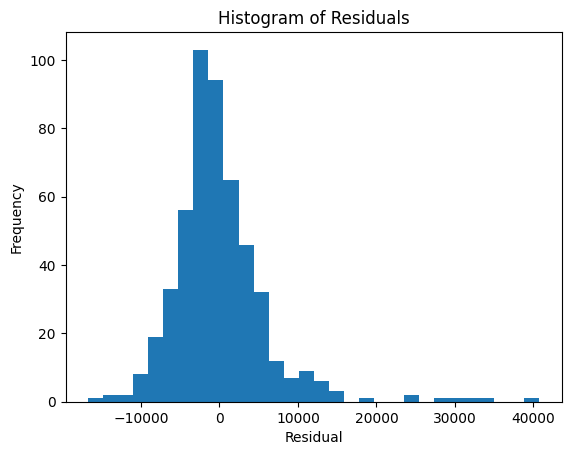

In [56]:

# Get residuals from the model
residuals9 = model9.resid

# Plot histogram
plt.hist(residuals9, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

**Comment:** The residuals are roughly centered around 0 which is a good sign, following a somewhat normal distribution. We note that the distribution is slightly skewed to the right, with a few large positive residuals, indicating that the model undervalues some observations.   The coefficients are:
- Constant $\beta_0$: -18680
    - Represents the predicted price when all predictors are zero (not meaningful in this context due to unrealistic values).
- Crime $\beta_1$: -136.5
    - For a one-unit increase in crime rate, house prices decrease by $136.5, holding other variables constant. Higher crime negatively impacts property values.
- Nox $\beta_2$: -660.5
    - For a one-unit increase in nitrogen oxide concentration, house prices decrease by $660.5. Pollution negatively affects housing prices.
- Rooms $\beta_3$: 7797.9
    - For a one-unit increase in the number of rooms, house prices increase by $7797.9. Larger houses tend to have higher prices.
- Proptax $\beta_4$: -89.41
    - For a one-unit increase in property tax rate, house prices decrease by $89.41, indicating higher taxes reduce affordability and desirability.

---


### 10. Run a regression of `lprice` on a constant, `crime`, `nox`, `rooms`, and `proptax`. Interpret all coefficients.


In [57]:
X10 = df[['crime', 'nox', 'rooms', 'proptax']]  # Independent variables
X10 = sm.add_constant(X10)  # Add a constant term to the model
y10 = df['lprice']  # Dependent variable
X10.head()


,const,crime,nox,rooms,proptax
0,1.0,0.006,5.38,6.57,29.6
1,1.0,0.027,4.69,6.42,24.2
2,1.0,0.027,4.69,7.18,24.2
3,1.0,0.032,4.58,7.00,22.2
4,1.0,0.069,4.58,7.15,22.2


In [58]:
# Create the model
model10 = sm.OLS(y10, X10).fit()

# Analyze model
print(model10.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          2.50e-101
Time:                        18:15:57   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

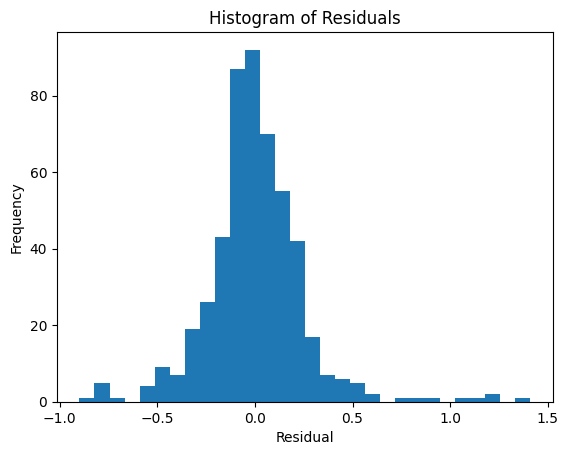

In [59]:
residuals10 = model10.resid

# Plot histogram
plt.hist(residuals10, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


**Comments:**  The histogram is roughly centered around 0, even more so than the last plot in question 9. The distribution is still slightly skewed to the right, but it appears to be less so than for the previous model.  
The coefficients are:
- Constant $\beta_0$: 8.6550
    - Represents the predicted log price when all predictors are zero (not meaningful in this context due to unrealistic values).
- Crime $\beta_1$: -0.0125
    - For a one-unit increase in crime rate, log house prices decrease by 0.0125, holding other variables constant. Higher crime negatively impacts property values.
- Nox $\beta_2$: -0.0476
    - For a one-unit increase in nitrogen oxide concentration, log house prices decrease by 0.0476. Pollution negatively affects housing prices.
- Rooms $\beta_3$: 0.2816
    - For a one-unit increase in the number of rooms, log house prices increase by 0.2816. Larger houses tend to have higher prices.
- Proptax $\beta_4$: -0.0043
    - For a one-unit increase in property tax rate, log house prices decrease by 0.0043, indicating higher taxes reduce affordability and desirability.

---


### 11. Run a regression of `lprice` on a constant, `crime`, `lnox`, `rooms`, and `lproptax`. Interpret all coefficients.

In [60]:
X11 = df[['crime', 'lnox', 'rooms', 'lproptax']]  # Independent variables
X11 = sm.add_constant(X11)  # Add a constant term to the model
y11 = df['lprice']  # Dependent variable
X11.head()

,const,crime,lnox,rooms,lproptax
0,1.0,0.006,1.682688,6.57,5.690360
1,1.0,0.027,1.545433,6.42,5.488938
2,1.0,0.027,1.545433,7.18,5.488938
3,1.0,0.032,1.521699,7.00,5.402678
4,1.0,0.069,1.521699,7.15,5.402678


In [61]:
# Create the model
model11 = sm.OLS(y11, X11).fit()

# Analyze model
print(model11.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          1.77e-101
Time:                        18:15:57   Log-Likelihood:                -26.021
No. Observations:                 506   AIC:                             62.04
Df Residuals:                     501   BIC:                             83.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7505      0.253     38.476      0.0

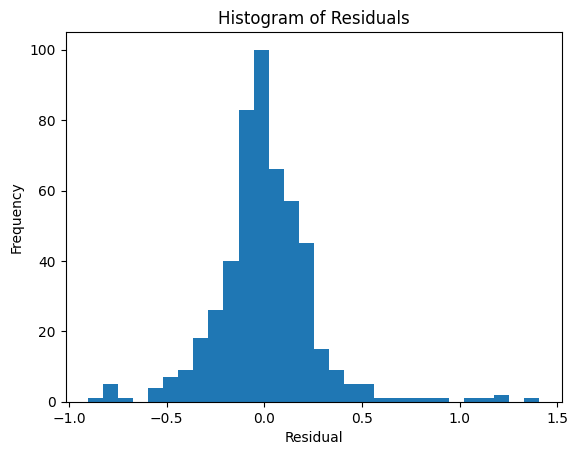

In [62]:
residuals11 = model11.resid

# Plot histogram
plt.hist(residuals11, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


**Comments:** Now the histogram plot of residuals is starting to look more like a normal distribution, with a slight skew to the right, and also still a few residuals on the left side around -0.8.


The coefficients are:
- Constant $\beta_0$: 9.7505
    - Represents the predicted log price when all predictors are zero (not meaningful in this context due to unrealistic values).
- Crime $\beta_1$: -0.0128
    - For a one-unit increase in crime rate, log house prices decrease by 0.0128, holding other variables constant. Higher crime negatively impacts property values.
- Lnox $\beta_2$: -0.2769
    - For a one-unit increase in the log of nitrogen oxide concentration, log house prices decrease by 0.2769. Pollution negatively affects housing prices.
- Rooms $\beta_3$: 0.2802
    - For a one-unit increase in the number of rooms, log house prices increase by 0.2802. Larger houses tend to have higher prices.
- Lproptax $\beta_4$: -0.1779
    - For a one-unit increase in the log of property tax rate, log house prices decrease by 0.1779, indicating higher taxes reduce affordability and desirability.


---

### 12. In the specification of question 9, test the hypothesis $H_0: \beta_{nox} = 0$ vs. $H_1: \beta_{nox} \neq 0$ at the 1% level using the p-value of the test.


Significance level $\alpha = 0.01$  
p-value for $\beta_{nox}: p = 0.0036$

If the p-value is less than the significance level, we reject the null hypothesis.  
Since $$p = 0.0036 < 0.01 = \alpha$$
The p-value is less than the significance level $\alpha$, and nox has a significant effect on price. Therefore, we reject $H_0$ in favor of $H_1$.

---

### 13. In the specification of question 9, test the hypothesis $H_0: \beta_{crime} = \beta_{proptax}$ at the 10% level.


We first rewrite the hypothesis as:
$$H_0: \beta_{crime} - \beta_{proptax} = 0$$
$$H_1: \beta_{crime} - \beta_{proptax} \neq 0$$
In words the null hypothesis states that the coefficients of crime and proptax are equal, while the alternative hypothesis states that they are significally different.

The goal is to calculate the F-statistic and compare it to the critical value at the 10% level. And to do this we need to define a restricted model also:

Our **unrestricted model** is:
$$
price = \beta_0 + \beta_1 \cdot crime + \beta_2 \cdot nox + \beta_3 \cdot rooms + \beta_4 \cdot proptax + \varepsilon
$$

Our **restricted model** is, using $\beta_{1} = \beta_{4}$ and substituting $\beta_{4}$ with $\beta_{1}$:
$$
price = \beta_0 + \beta_{1} \cdot (crime + proptax) + \beta_2 \cdot nox + \beta_3 \cdot rooms + \varepsilon
$$



The F-statistic is calculated as:
$$F = \frac{(SSR_{R} - SSR_{U})/q}{SSR_{U}/(n-k)}$$

where:
- $SSR_{R}$ is the sum of squared residuals for the restricted model
- $SSR_{U}$ is the sum of squared residuals for the unrestricted model
- $n$ is the number of observations
- $k$ is the number of coefficients in the unrestricted model
- $q$ is the number of restrictions






In [89]:
# The unrestriced model is the same as model 9
model13_unrestricted = model9

# Create a new variable that combines 'crime' and 'proptax'
df['crime_proptax'] = df['crime'] + df['proptax']
# Select the independent variables
X13 = df[['crime_proptax', 'nox', 'rooms']]  # Include the new variable
X13 = sm.add_constant(X13)  # Add a constant term to the model
y13 = y9 # The same dependent variable as in model 9
X13.head()

model13_restricted = sm.OLS(y13, X13).fit()

print(model13_restricted.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     226.0
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           9.50e-93
Time:                        18:17:00   Log-Likelihood:                -5120.0
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     502   BIC:                         1.026e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.846e+04   3204.969     -5.761

In [64]:
# Extract the RRS values
RSS13_restricted = model13_restricted.ssr
RSS13_unrestricted = model13_unrestricted.ssr

# Number of restrictions (q), observations (n), and parameters (k)
q13 = X9.shape[1] - X13.shape[1]
print("Number of restrictions (q):", q13)
n13 = y9.shape[0]
print("Number of observations (n):", n13)
k13 = len(model13_unrestricted.params) # number of parameters in the unrestricted model including the constant term
print("Number of parameters (k):", k13)

Number of restrictions (q): 1
Number of observations (n): 506
Number of parameters (k): 5


In [87]:
# F-statistic
f_stat13 = ((RSS13_restricted - RSS13_unrestricted) / q13) / (RSS13_unrestricted / (n13 - k13))


# Compute the p-value
p_value13 = 1 - stats.f.cdf(f_stat13, q13, n13 - k13)

print("F-statistic:", f_stat13)
print("p-value:", p_value13)

alpha13 = 0.10

if p_value13 < alpha13:
    print("Reject the null hypothesis ")
    print("\nThe p-value", p_value13, "is less than the alpha value", alpha13)
else:
    print("Fail to reject the null hypothesis")
    print("\nThe p-value", p_value13.round(2), "is greater than the alpha value", alpha13)



F-statistic: 0.7738843560083407
p-value: 0.379439828121641
Fail to reject the null hypothesis

The p-value 0.38 is greater than the alpha value 0.1


This means that we cannot reject the null hypothesis $$H_0 : \beta_{crime} = \beta_{proptax}$$ at the 10% level, as the p-value of the test is greater than the significance level. This implies that the coefficients of crime and proptax are rather equal.  


#### **Alternative Approach:**

This analysis tests the hypothesis $ H_0: \beta_{\text{crime}} = \beta_{\text{proptax}} $, which evaluates whether crime rate and property tax have statistically equivalent effects on housing prices. The model is reformulated by introducing a new variable $ Z = \text{crime} + \text{proptax} $, allowing us to isolate $ \theta = \beta_{\text{crime}} - \beta_{\text{proptax}} $.

An OLS regression is performed using the predictors:
- A constant ($ \text{const} $),
- **crime rate** (for $ \theta $),
- $ Z $,
- **nox** 
- **rooms** 

The coefficient of **crime rate** corresponds to $ \theta $. A t-test is conducted at the 10% significance level to determine if $ \theta = 0 $, indicating equivalent effects of crime rate and property tax.


In [95]:

# Define X and y
X132 = df[['crime', 'nox', 'rooms', 'proptax']]  # Independent variables
X132 = sm.add_constant(X132)  # Add a constant term to the model
y132 = df['price']  # Dependent variable

# Create the new regressor Z = crime + proptax
X132['Z'] = X132['crime'] + X132['proptax']

# Redefine the independent variable set for the reformulated model
X_reformulated = X132[['const', 'crime', 'Z', 'nox', 'rooms']]

# Fit the reformulated model
model_reformulated = sm.OLS(y132, X_reformulated).fit()


# Compute the t-statistic and p-value for theta
t_stat_theta = model_reformulated.tvalues['crime']
p_value_theta = model_reformulated.pvalues['crime']

# Print regression summary
print(model_reformulated.summary())
print()

# Hypothesis test at the 10% significance level
alpha = 0.10
if p_value_theta < alpha:
    print("Reject the null hypothesis H0: beta_crime = beta_proptax at the 10% significance level.")
    print(f"P-value: {p_value_theta:.4f}")
else:
    print("Do not reject the null hypothesis H0: beta_crime = beta_proptax at the 10% significance level.")
    print(f"P-value: {p_value_theta:.4f}")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.06e-91
Time:                        19:54:12   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

This is the same p-value as calculated above, but we can also calculate it using the t-test for the coefficients of crime and proptax. 


---

### 14. In the specification of question 9, test the hypothesis $H_0: \beta_{nox} = 0, \beta_{proptax} = 0$ at the 10% level.


In this case we have two restrictions. The null hypothesis is:
$$H_0: \beta_{nox} = 0, \beta_{proptax} = 0$$
$$H_1: \text{At least one of the coefficients is different from 0}$$

The goal is to calculate the F-statistic and compare it to the critical value at the 10% level. And to do this we have the same **unrestricted model**:
$$
price = \beta_0 + \beta_1 \cdot crime + \beta_2 \cdot nox + \beta_3 \cdot rooms + \beta_4 \cdot proptax + \varepsilon
$$

Our restricted model is, using $\beta_{nox} = 0$ and $\beta_{proptax} = 0$:
$$
price = \beta_0 + \beta_1 \cdot crime + \beta_3 \cdot rooms + \varepsilon
$$


In [66]:
# Same as before
model14_unrestricted = model9

# Create a new variable that removes 'nox' and 'proptax'
X14 = df[['crime', 'rooms']]  # Exclude 'nox' and 'proptax'
X14 = sm.add_constant(X14)  # Add a constant term to the model
y14 = y9  # The same dependent variable as in model 9

model14_restricted = sm.OLS(y14, X14).fit()

In [67]:
# Extract the RRS values
RSS14_restricted = model14_restricted.ssr
RSS14_unrestricted = model14_unrestricted.ssr

# Number of restrictions (q), observations (n), and parameters (k)
q14 = X9.shape[1] - X14.shape[1]
print("Number of restrictions (q):", q14)
n14 = y9.shape[0]
print("Number of observations (n):", n14)
k14 = len(model14_unrestricted.params) # number of parameters in the unrestricted model including the constant term
print("Number of parameters (k):", k14)


Number of restrictions (q): 2
Number of observations (n): 506
Number of parameters (k): 5


In [68]:
# F-statistic
f_stat14 = ((RSS14_restricted - RSS14_unrestricted) / q14) / (RSS14_unrestricted / (n14 - k14))

# Compute the p-value
p_value14 = 1 - stats.f.cdf(f_stat14, q14, n14 - k14)

alpha14 = 0.10

if p_value14 < alpha14:
    print("Reject the null hypothesis ")
    print(f"\nThe p-value {p_value14:.3f} is less than the alpha value {alpha14:.3f}")
else:
    print("Fail to reject the null hypothesis")
    print(f"\nThe p-value {p_value14:.3f} is greater than the alpha value {alpha14:.3f}")


Reject the null hypothesis 

The p-value 0.000 is less than the alpha value 0.100


This means that we reject the null hypothesis $$H_0 : \beta_{nox} = 0, \beta_{proptax} = 0$$ at the 10% level, as the p-value of the test is less than the significance level. This implies that at least one of the coefficients is different from 0.

---

### 15. In the specification of question 9, test the hypothesis $H_0: \beta_{nox} = -500, \beta_{proptax} = -100$ at the 10% level using the p-value of the test.


Since we know that the coefficients for the unrestricted model are: 
- $\beta_{nox} = -660.5$
- $\beta_{proptax} = -89.41$

We can suspect that this hypothesis will not rejected, as the coefficients are close to the values in the null hypothesis. The question is if it will be rejected on the 10% level.

The null hypothesis is:
$$H_0: \beta_{nox} = -500, \beta_{proptax} = -100$$
The alternative hypothesis is:
$$H_1: \text{At least one of the coefficients is different from the values in the null hypothesis}$$

To test this we impose 2 restrictions on the unrestricted model. The **unrestricted model** is still:
$$
price = \beta_0 + \beta_1 \cdot crime + \beta_2 \cdot nox + \beta_3 \cdot rooms + \beta_4 \cdot proptax + \varepsilon
$$

Our restricted model is, using $\beta_{nox} = -500$ and $\beta_{proptax} = -100$:
$$
price = \beta_0 + \beta_1 \cdot crime - 500 \cdot nox  + \beta_3 \cdot rooms - 100 \cdot proptax + \varepsilon
$$


In [69]:
model15_unrestricted = model9

X15 = df[['crime', 'nox', 'rooms', 'proptax']] 
X15 = sm.add_constant(X15)
X15['nox'] = X15['nox'] * (-500)
X15['proptax'] = X15['proptax'] * -(100)
y15 = y9

model15_restricted = sm.OLS(y15, X15).fit()

In [70]:
# Extract the RRS values
RSS15_restricted = model15_restricted.ssr
RSS15_unrestricted = model15_unrestricted.ssr

# Number of restrictions (q), observations (n), and parameters (k)
q15 = 2
print("Number of restrictions (q):", q15)
n15 = y9.shape[0]
print("Number of observations (n):", n15)
k15 = len(model15_unrestricted.params) # number of parameters in the unrestricted model including the constant term
print("Number of parameters (k):", k15)


Number of restrictions (q): 2
Number of observations (n): 506
Number of parameters (k): 5


In [71]:
# F-statistic
f_stat15 = ((RSS15_restricted - RSS15_unrestricted) / q15) / (RSS15_unrestricted / (n15 - k15))

# Compute the p-value
p_value15 = 1 - stats.f.cdf(f_stat15, q15, n15 - k15)

alpha15 = 0.10

if p_value15 < alpha15:
    print("Reject the null hypothesis ")
    print(f"\nThe p-value {p_value15:.3f} is less than the alpha value {alpha15:.3f}")
else:
    print("Fail to reject the null hypothesis")
    print(f"\nThe p-value {p_value15:.3f} is greater than the alpha value {alpha15:.3f}")
    


Fail to reject the null hypothesis

The p-value 1.000 is greater than the alpha value 0.100


We failed to reject the hypothesis that the coefficients of 'nox' and 'proptax' are equal to -500 and -100, respectively. As expected, the coefficients of 'nox' and 'proptax' are not significantly different from -500 and -100, respectively.

---

### 16. In the specification of question 9, test the hypothesis that all coefficients are the same for observations with low levels of `nox` vs. medium and high levels of `nox`.




#### <span style="color:red;">Note that we thought that this question was ambiguous, so we provided 2 solutions: 16.1 and 16.2</span>

#### 16.1 Solution for `Low vs Medium vs High` levels of `nox`:

To do this we create 3 different restricted models for each group of `nox` levels:

$$
price = \beta_0 + \beta_1 \cdot crime_{low_{nox}} + \beta_2 \cdot rooms_{low_{nox}} + \beta_3 \cdot nox_{low_{nox}} + \beta_4 \cdot proptax_{low_{nox}} + \varepsilon
$$

$$
price = \beta_0 + \beta_1 \cdot crime_{med_{nox}} + \beta_2 \cdot rooms_{med_{nox}} + \beta_3 \cdot nox_{med_{nox}} + \beta_4 \cdot proptax_{med_{nox}} + \varepsilon
$$

$$
price = \beta_0 + \beta_1 \cdot crime_{high_{nox}} + \beta_2 \cdot rooms_{high_{nox}} + \beta_3 \cdot nox_{high_{nox}} + \beta_4 \cdot proptax_{high_{nox}} + \varepsilon
$$

The unrestricted model is same as before:
$$
price = \beta_0 + \beta_1 \cdot crime + \beta_2 \cdot nox + \beta_3 \cdot rooms + \beta_4 \cdot proptax + \varepsilon
$$



We can use this formula as provided in the `Course 3.pdf` slide 36:
$$
F = \frac{(\text{SSR} - (\text{SSR}_1 + \text{SSR}_2))}{\text{SSR}_1 + \text{SSR}_2} \cdot \frac{[n - 2(k + 1)]}{k + 1}
$$

Although, we interpret the `k + 1` as the number of parameters plus the intercept, and we are using 3 groups, so the formula should be:
$$
F = \frac{(\text{SSR} - (\text{SSR}_1 + \text{SSR}_2 + \text{SSR}_3))}{\text{SSR}_1 + \text{SSR}_2 + \text{SSR}_3} \cdot \frac{[n - 3k]}{k}
$$


In [72]:
# Create 3 dataframes based on the nox_category
df_low = df[df['nox_category'] == 'Low']
df_medium = df[df['nox_category'] == 'Medium']
df_high = df[df['nox_category'] == 'High']

In [73]:
X16_low = df_low[['crime', 'nox', 'rooms', 'proptax']]
X16_low = sm.add_constant(X16_low)

X16_medium = df_medium[['crime', 'nox', 'rooms', 'proptax']]
X16_medium = sm.add_constant(X16_medium)

X16_high = df_high[['crime', 'nox', 'rooms', 'proptax']]
X16_high = sm.add_constant(X16_high)

y16_low = df_low['price']
y16_medium = df_medium['price']
y16_high = df_high['price']


model16_low = sm.OLS(y16_low, X16_low).fit()
model16_medium = sm.OLS(y16_medium, X16_medium).fit()
model16_high = sm.OLS(y16_high, X16_high).fit()
model16_original = model9


In [74]:
RSS16_low = model16_low.ssr
RSS16_medium = model16_medium.ssr
RSS16_high = model16_high.ssr
RSS16_original = model16_original.ssr

q16 = 3
print("Number of restrictions (q):", q16)
n16 = y9.shape[0]
print("Number of observations (n):", n16)
k16 = len(model16_original.params)
print("Number of parameters (k):", k16)

Number of restrictions (q): 3
Number of observations (n): 506
Number of parameters (k): 5


In [75]:

f_stat16 = ((RSS16_original - (RSS16_low + RSS16_medium + RSS16_high)) / (RSS16_low + RSS16_medium + RSS16_high)) * ((n16 - 3 * k16)) / k16

# Compute the p-value
p_value16 = 1 - stats.f.cdf(f_stat16, q16, n16 - 3 * k16)

# Print the results
print(f"F-statistic: {f_stat16}")
print(f"p-value: {p_value16}")

# Decision
alpha = 0.10  # Significance level
if p_value16 < alpha:
    print("Reject H0: Coefficients differ significantly across 'Low', 'Medium', and 'High' nox categories.")
else:
    print("Fail to reject H0: No significant difference in coefficients across nox categories.")

F-statistic: 39.74626948072125
p-value: 1.1102230246251565e-16
Reject H0: Coefficients differ significantly across 'Low', 'Medium', and 'High' nox categories.


We reject the hypothesis that all coefficients are the same for observations with low levels of `nox` vs. medium and high levels of `nox`. This implies that the coefficients are significantly different across the three groups, which is interesting because it suggests that the effect of the predictors on the dependent variable varies depending on the level of `nox`. Since the p-value is increadibly low, it implies that using a pooled model (one set of coefficients for all groups) is inappropriate.

---

#### 16.2 Solution for `Low vs (Medium, High)` levels of `nox`

In [76]:
df['nox_category_2'] = df['nox_category'].replace({'Medium': 'Medium_and_High', 'High': 'Medium_and_High'})

/var/folders/m7/n_7wlxws2c78dvvqtvvsykl40000gn/T/ipykernel_12590/1185345790.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['nox_category_2'] = df['nox_category'].replace({'Medium': 'Medium_and_High', 'High': 'Medium_and_High'})


Null Hypothesis ($H_0$): The coefficients for all variables (crime, rooms, nox, and proptax) are the same for the Low and Medium_and_High groups.

Alternative Hypothesis ($H_1$): At least one coefficient differs between the two groups.


In [77]:
df['crime_low'] = (df['nox_category_2'] == 'Low') * df['crime']
df['crime_medium_and_high'] = (df['nox_category_2'] == 'Medium_and_High') * df['crime']

df['rooms_low'] = (df['nox_category_2'] == 'Low') * df['rooms']
df['rooms_medium_and_high'] = (df['nox_category_2'] == 'Medium_and_High') * df['rooms']

df['nox_low'] = (df['nox_category_2'] == 'Low') * df['nox']
df['nox_medium_and_high'] = (df['nox_category_2'] == 'Medium_and_High') * df['nox']

df['proptax_low'] = (df['nox_category_2'] == 'Low') * df['proptax']
df['proptax_medium_and_high'] = (df['nox_category_2'] == 'Medium_and_High') * df['proptax']


In [78]:
unrestricted_model16 = sm.OLS(
    df['price'], 
    sm.add_constant(df[['crime_low', 'crime_medium_and_high', 
                        'rooms_low', 'rooms_medium_and_high',
                        'nox_low', 'nox_medium_and_high',
                        'proptax_low', 'proptax_medium_and_high']])
).fit()

restricted_model16 = sm.OLS(
    df['price'], 
    sm.add_constant(df[['crime', 'rooms', 'nox', 'proptax']])
).fit()


In [79]:
# Residual Sum of Squares (RSS)
RSS_restricted16 = restricted_model16.ssr
RSS_unrestricted16 = unrestricted_model16.ssr

# Degrees of freedom
q16 = len(unrestricted_model16.params) - len(restricted_model16.params)  # Number of restrictions
print("Number of restrictions (q):", q16)
n16 = df.shape[0]  # Number of observations
print("Number of observations (n):", n16)
k16 = len(unrestricted_model16.params)  # Number of parameters in unrestricted model
print("Number of parameters (k):", k16)

Number of restrictions (q): 4
Number of observations (n): 506
Number of parameters (k): 9


In [80]:

# F-statistic
f_stat16 = ((RSS_restricted16 - RSS_unrestricted16) / q16) / (RSS_unrestricted16 / (n16 - k16))

# p-value
p_value16 = 1 - stats.f.cdf(f_stat16, q16, n16 - k16)

# Print results
print(f"F-statistic: {f_stat16}")
print(f"p-value: {p_value16}")

# Decision
alpha16 = 0.10
if p_value16 < alpha:
    print("Reject H0: Coefficients differ significantly between the 'Low' and 'Medium_and_High' groups.")
else:
    print("Fail to reject H0: No significant difference in coefficients between the two groups.")


F-statistic: 6.0612165435984
p-value: 9.091134829142256e-05
Reject H0: Coefficients differ significantly between the 'Low' and 'Medium_and_High' groups.


This shows that the p-value is very low for the F-test, which implies that we reject the null hypothesis. This means that the coefficients for the Low and Medium_and_High groups are significantly different, and a pooled model is inappropriate.


---


### 17. Repeat the test of question 16 but now assuming that only the coefficients of `nox` and `proptax` can change between the two groups of observations. State and test $H_0$.



#### <span style="color:red;">Same ambiguity here, solutions: 17.1 and 17.2</span>

#### 17.1 Solution for `Low vs Medium vs High` levels of `nox`

We just proved in the previous question that all coefficients are definetly not the same for different levels of `nox`. 


Null Hypothesis ($H_0$): The coefficients of nox and proptax are the same across groups (Low, Medium, and High nox), while other coefficients (crime, rooms, intercept) remain constant.
Alternative Hypothesis ($H_1$): The coefficients of nox and/or proptax differ between groups.


We approach this by creating 1 restricted model with 3 separate coefficients for `nox` and `proptax` for each of the 3 groups of `nox` levels. 
The restricted model is:
$$
\begin{aligned}
price = & \ \beta_0 \\
       & + \beta_1 \cdot crime \\
       & + \beta_{21} \cdot nox_{low} + \beta_{22} \cdot nox_{med} + \beta_{23} \cdot nox_{high} \\
       & + \beta_3 \cdot rooms \\
       & + \beta_{41} \cdot proptax_{low} + \beta_{42} \cdot proptax_{med} + \beta_{43} \cdot proptax_{high} \\
       & + \varepsilon
\end{aligned}
$$

The unrestricted model therefore:
$$
\begin{aligned}
price = & \ \beta_0 \\
       & + \beta_{11} \cdot crime_{low} + \beta_{12} \cdot crime_{med} + \beta_{13} \cdot crime_{high} \\
       & + \beta_{21} \cdot nox_{low} + \beta_{22} \cdot nox_{med} + \beta_{23} \cdot nox_{high} \\
       & + \beta_{31} \cdot rooms_{low} + \beta_{32} \cdot rooms_{med} + \beta_{33} \cdot rooms_{high} \\
       & + \beta_{41} \cdot proptax_{low} + \beta_{42} \cdot proptax_{med} + \beta_{43} \cdot proptax_{high} \\
       & + \varepsilon
\end{aligned}
$$



In [81]:
# Restricted model: Pool `crime`, `rooms`, and intercept, but allow `nox` and `proptax` to vary
df['nox_low'] = (df['nox_category'] == 'Low') * df['nox']
df['nox_medium'] = (df['nox_category'] == 'Medium') * df['nox']
df['nox_high'] = (df['nox_category'] == 'High') * df['nox']

df['proptax_low'] = (df['nox_category'] == 'Low') * df['proptax']
df['proptax_medium'] = (df['nox_category'] == 'Medium') * df['proptax']
df['proptax_high'] = (df['nox_category'] == 'High') * df['proptax']

# Restricted model
restricted_model = sm.OLS(
    df['price'], 
    sm.add_constant(df[['crime', 'rooms', 'nox_low', 'nox_medium', 'nox_high', 
                        'proptax_low', 'proptax_medium', 'proptax_high']])
).fit()

# Unrestricted model: Allow all coefficients to vary across groups
df['crime_low'] = (df['nox_category'] == 'Low') * df['crime']
df['crime_medium'] = (df['nox_category'] == 'Medium') * df['crime']
df['crime_high'] = (df['nox_category'] == 'High') * df['crime']

df['rooms_low'] = (df['nox_category'] == 'Low') * df['rooms']
df['rooms_medium'] = (df['nox_category'] == 'Medium') * df['rooms']
df['rooms_high'] = (df['nox_category'] == 'High') * df['rooms']

unrestricted_model = sm.OLS(
    df['price'], 
    sm.add_constant(df[['crime_low', 'crime_medium', 'crime_high',
                        'rooms_low', 'rooms_medium', 'rooms_high',
                        'nox_low', 'nox_medium', 'nox_high', 
                        'proptax_low', 'proptax_medium', 'proptax_high']])
).fit()


In [82]:
# Residual Sum of Squares (RSS)
RSS_restricted = restricted_model.ssr
RSS_unrestricted = unrestricted_model.ssr

# Degrees of freedom
q17 = len(unrestricted_model.params) - len(restricted_model.params)  # Number of restrictions
print("Number of restrictions (q):", q17)
n17 = df.shape[0]  # Number of observations
print("Number of observations (n):", n17)
k17 = len(unrestricted_model.params)  # Number of parameters in unrestricted model
print("Number of parameters (k):", k17)

Number of restrictions (q): 4
Number of observations (n): 506
Number of parameters (k): 13


In [83]:

# F-statistic
f_stat17 = ((RSS_restricted - RSS_unrestricted) / (RSS_unrestricted))*((n17 - 4*k17)/k17)

# Compute the p-value
p_value17 = 1 - stats.f.cdf(f_stat17, q17, n17 - q17*k17)


# Print the results
print(f"F-statistic: {f_stat17}")
print(f"p-value: {p_value17}")
print()


# Decision
# If we do not have a significance level we can say at which significance level we reject the null hypothesis

# If no significance level is provided, interpret the p-value
if p_value17 < 0.01:
    print("The null hypothesis is rejected at a significance level of 1%.")
elif p_value17 < 0.05:
    print("The null hypothesis is rejected at a significance level of 5%, but not at 1%.")
elif p_value17 < 0.10:
    print("The null hypothesis is rejected at a significance level of 10%, but not at 5%.")
else:
    print("The null hypothesis cannot be rejected even at the 10% significance level.")


F-statistic: 3.2843083846284697
p-value: 0.011377995528363605

The null hypothesis is rejected at a significance level of 5%, but not at 1%.


This means that, compared to the previous test, we have much higher chance of accepting the null hypothesis, since the p-value is much larger in this case where we only allow `nox` and `proptax` to change between the groups.

---

#### 17.2 Solution for `Low vs (Medium, High)` levels of `nox`

Null Hypothesis ($H_0$): The coefficients of nox and proptax are the same across groups (Low nox, Medium and High nox), while other coefficients (crime, rooms, intercept) remain constant.
Alternative Hypothesis ($H_1$): The coefficients of nox and/or proptax differ between groups.

The restricted model is:
$$
\begin{aligned}
price = & \ \beta_0 \\
       & + \beta_1 \cdot crime \\
       & + \beta_{21} \cdot nox_{low} + \beta_{22} \cdot nox_{high} \\
       & + \beta_3 \cdot rooms \\
       & + \beta_{41} \cdot proptax_{low} + \beta_{42} \cdot proptax_{high} \\
       & + \varepsilon
\end{aligned}
$$

The unrestricted model therefore:
$$
\begin{aligned}
price = & \ \beta_0 \\
       & + \beta_{11} \cdot crime_{low} + \beta_{12} \cdot crime_{high} \\
       & + \beta_{21} \cdot nox_{low} + \beta_{22} \cdot nox_{high} \\
       & + \beta_{31} \cdot rooms_{low} + \beta_{32} \cdot rooms_{high} \\
       & + \beta_{41} \cdot proptax_{low} + \beta_{42} \cdot proptax_{high} \\
       & + \varepsilon
\end{aligned}
$$

In [84]:

restricted_model172 = sm.OLS(
    df['price'], 
    sm.add_constant(df[['crime', 'rooms', 'nox_low', 'nox_medium_and_high', 
                        'proptax_low', 'proptax_medium_and_high']])
).fit()


unrestricted_model172 = sm.OLS(
    df['price'], 
    sm.add_constant(df[['crime_low', 'crime_medium_and_high', 
                        'rooms_low', 'rooms_medium_and_high',
                        'nox_low', 'nox_medium_and_high',
                        'proptax_low', 'proptax_medium_and_high']])
).fit()

In [85]:
# Residual Sum of Squares (RSS)
RSS_restricted172 = restricted_model172.ssr
RSS_unrestricted172 = unrestricted_model172.ssr

# Degrees of freedom
q172 = len(unrestricted_model172.params) - len(restricted_model172.params)  # Number of restrictions
print("Number of restrictions (q):", q172)
n172= df.shape[0]  # Number of observations
print("Number of observations (n):", n172)
k172 = len(unrestricted_model172.params)  # Number of parameters in unrestricted model
print("Number of parameters (k):", k172)


Number of restrictions (q): 2
Number of observations (n): 506
Number of parameters (k): 9


In [86]:

# F-statistic
f_stat172 = (((RSS_restricted172 - RSS_unrestricted172)) / (RSS_unrestricted172))*((n172 - q172*k172)/k172)

# p-value
p_value172 = 1 - stats.f.cdf(f_stat172, q172, n172 - k172)

# Print results
print(f"F-statistic: {f_stat172}")
print(f"p-value: {p_value172}")


# If no significance level is provided, interpret the p-value
if p_value172 < 0.01:
    print("The null hypothesis is rejected at a significance level of 1%.")
elif p_value172 < 0.05:
    print("The null hypothesis is rejected at a significance level of 5%, but not at 1%.")
elif p_value172 < 0.10:
    print("The null hypothesis is rejected at a significance level of 10%, but not at 5%.")
else:
    print("The null hypothesis cannot be rejected even at the 10% significance level.")

F-statistic: 2.4675319031812553
p-value: 0.08583216410095529
The null hypothesis is rejected at a significance level of 10%, but not at 5%.


This makes sence because now we have showed that the significance levels, at which we can reject the null hypothesis, differ between the ambiguous analysis of `Low vs Medium vs High` and `Low vs (Medium, High)` levels of `nox`. As expected, the significance level is higher if we have 2 groups compared to 3 groups. When we used 3 groups (low, medium, high), we could reject the null hypothesis at significance level 5%, and when we used 2 groups (low, medium_high), we could reject the null hypothesis at significance level 10%. Which makes sense since the coefficients would likely vary more between 3 groups than between 2 groups.

---